<a href="https://colab.research.google.com/github/SebasUrbina/TextAnalysisProgramaCandidatos2021/blob/main/word_cloud_presidenciales_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerias

In [1]:
import nltk
import pandas as pd
from collections import Counter
import string
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from random import sample
import numpy as np
from PIL import Image
import cv2
import requests
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

!python -m spacy download es
import spacy
from torchtext.data.utils import get_tokenizer
import matplotlib.pyplot as plt
%matplotlib inline
# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'
#pd.set_option(\"display.precision\", 2)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
     |████████████████████████████████| 16.2 MB 4.5 MB/s 
  Created wheel for es-core-news-sm: filename=es_core_news_sm-2.2.5-py3-none-any.whl size=16172933 sha256=ebe090a9c8aa554600a0b66a6ddfa6cc2420c392f5fd3949666a78137ea621b6
  Stored in directory: /tmp/pip-ephem-wheel-cache-3n4f4a1f/wheels/21/8d/a9/6c1a2809c55dd22cd9644ae503a52ba6206b04aa57ba83a3d8
Successfully built es-core-news-sm
✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/es_core_news_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/es
You can now load the model via spacy.load('es')


Puntuación que se utilizará para filtrar el documento

In [2]:
tokenizer = get_tokenizer("spacy", "es") # Creamos el tokenizador de español utilizando get_gokenizer de tortch y spacy
nlp = spacy.load('es')
punctuation = string.punctuation + '\na\x0c\x0c●' + 999*'.' # Definimos la puntuación y algunas otros caracteres a filtrar
stopwords = pd.read_csv('https://raw.githubusercontent.com/Alir3z4/stop-words/master/spanish.txt').values # Cargamos las stopwords en español

def tokenizar_texto(programa):
    assert type(programa) is str and programa[-4:]=='.txt', 'Programa debe ser el archivo .txt'

    tokens = [] # Almacenamos los tokens luego del proceso de filtrado y limpieza
    with open(programa, encoding = 'utf-8') as f:
        lines = f.readlines()
    for line in lines:
        tokens_ = tokenizer(line)
        for token in tokens_:
            token = token.lower()
            if token not in punctuation and token not in stopwords:
                tokens.append(token)
    return tokens

#tokens = [word.lower() for word in word_tokenize(line) for line in lines if word.lower() not in punctuation]

# Funciones útiles

In [3]:
def wordcloud(tokens, nombre, with_mask=False, mask=None, bg='black', colormap='Accent'):
    assert type(tokens) is list and type(nombre) is str

    plt.rcParams['figure.figsize'] = (16,16)
    text = " ".join(tokens)

    if with_mask:
        wordcloud = WordCloud(width=1920, height=1080, background_color="white", mask=mask, colormap='Dark2',contour_color='black', contour_width=0.5).generate(text)
        wordcloud.to_file("word_cloud_with_mask_{}.png".format(nombre))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.figure(figsize=(20,10), facecolor='w')
        plt.show()
        #plt.savefig('wordcloud.png', facecolor='w', bbox_inches='tight')
    else:
        # Generate a word cloud image
        wordcloud = WordCloud(width = 1920, height = 1080, background_color=bg, colormap=colormap).generate(text)
        # Display the generated image:
        # the matplotlib way:
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        #plt.figure( figsize=(20,10), facecolor='k')
        plt.show()
        wordcloud.to_file("word_cloud_{}.png".format(nombre))

In [4]:
def png_to_mask(img):
    image = np.array(Image.open(img))
    gray = image[:,:,3]
    _, mask = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV) #THRESH_BINARY_INV,THRESH_TOZERO
    #plt.imshow(mask, cmap='gray')
    return mask

https://www.geeksforgeeks.org/python-thresholding-techniques-using-opencv-set-1-simple-thresholding/

Obtenemos los tokens o palabras clave de todos los programas

In [5]:
tokens = {}
candidatos = ['boric','sichel','kast','provoste']
for candidato in candidatos:
    tokens[candidato] = tokenizar_texto('programa_{}.txt'.format(candidato))
    print('Cantidad de tokens {}: {}'.format(candidato,len(tokens[candidato])))
    print('Algunos tokens {}: {}'.format(candidato, sample(tokens[candidato],5)))

Cantidad de tokens boric: 39243
Algunos tokens boric: ['búsqueda', 'apoyará', 'región', 'pobreza', 'tercio']
Cantidad de tokens sichel: 11851
Algunos tokens sichel: ['persistentes', 'propósito', 'diagnóstico', 'favorecer', 'lograrlo']
Cantidad de tokens kast: 8832
Algunos tokens kast: ['impuestos', 'cristo', 'bancoestado', 'víctimas', 'planes']
Cantidad de tokens provoste: 26699
Algunos tokens provoste: ['unidas', 'desarrollados', 'ejecución', 'avanzado', 'ciclista']


# Gabriel Boric

Referencia programa: https://www.boricpresidente.cl/wp-content/uploads/2021/05/manifiesto_gabriel_boric.pdf

Utilizamos [PDFtoText](https://pdftotext.com/es/) para convertir el programa y trabajarlo de manera más cómoda en `.txt`

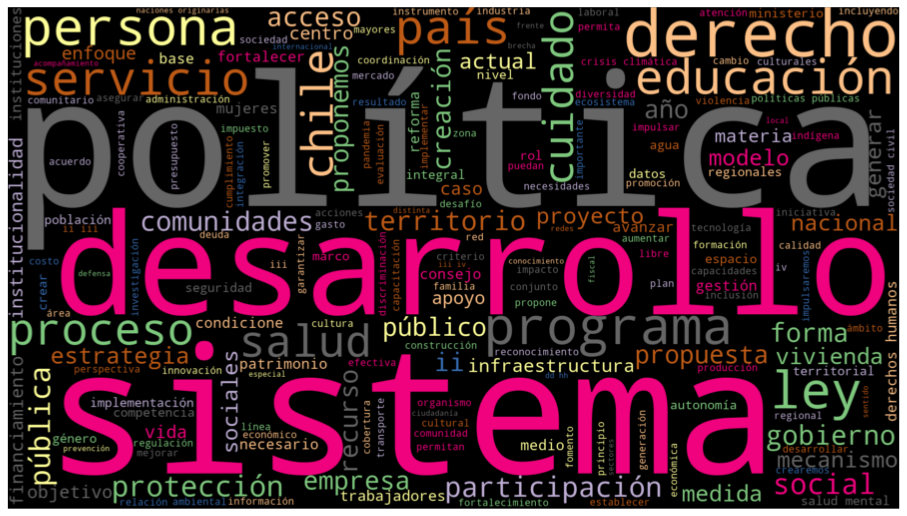

In [6]:
wordcloud(tokens['boric'], 'boric')

Referencia imagen: https://www.epicentrochile.com/2021/06/22/boric-asegura-que-con-daniel-jadue-tocaran-temas-novedosos-en-debate-presidencial/

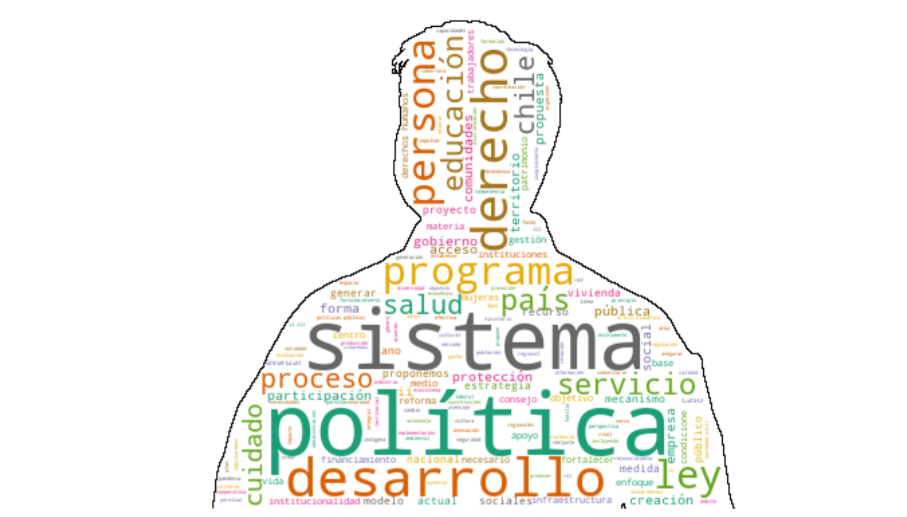

<Figure size 1440x720 with 0 Axes>

In [7]:
wordcloud(tokens['boric'],'boric',with_mask=True,mask=png_to_mask('boric.png'),colormap='Dark2')

# Sebastián Sichel

Programa: https://www.servel.cl/wp-content/uploads/2021/06/3_PROGRAMA_SEBASTIAN_SICHEL.pdf

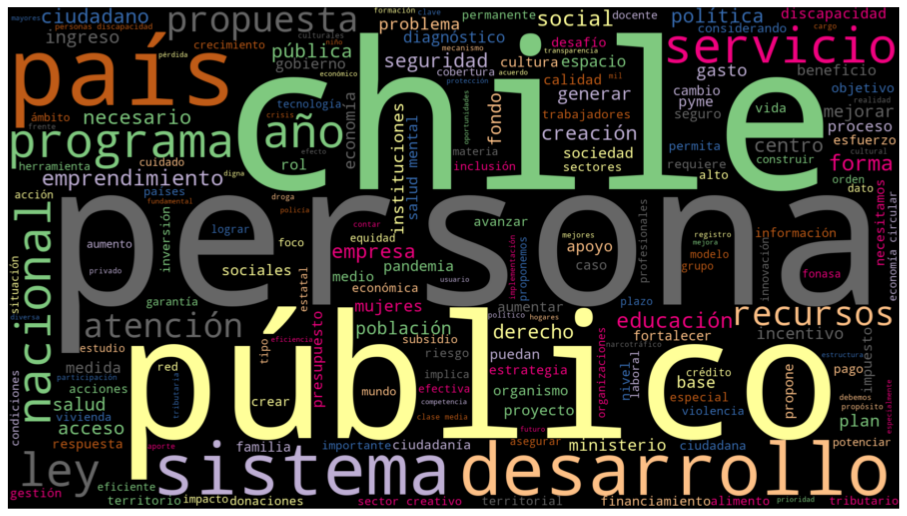

In [8]:
wordcloud(tokens['sichel'],'sichel')

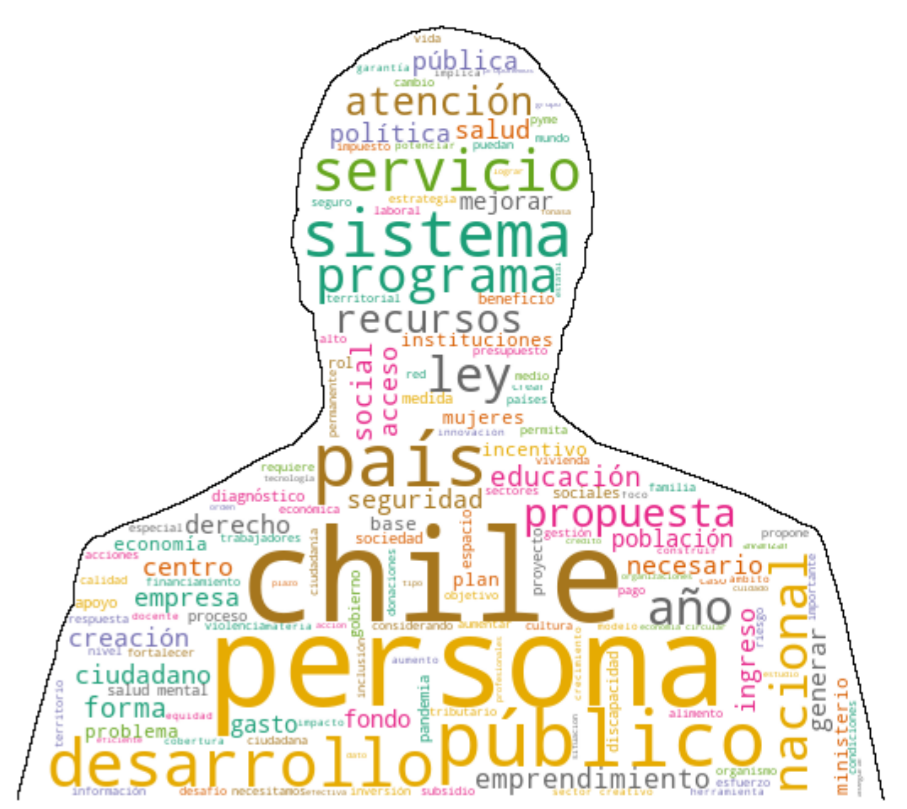

<Figure size 1440x720 with 0 Axes>

In [9]:
wordcloud(tokens['sichel'], 'sichel', with_mask=True, mask=png_to_mask('sichel.png'))

# José Antonio Kast

Programa: https://www.servel.cl/wp-content/uploads/2017/09/Programa_Jose_Antonio_Kast_Rist.pdf

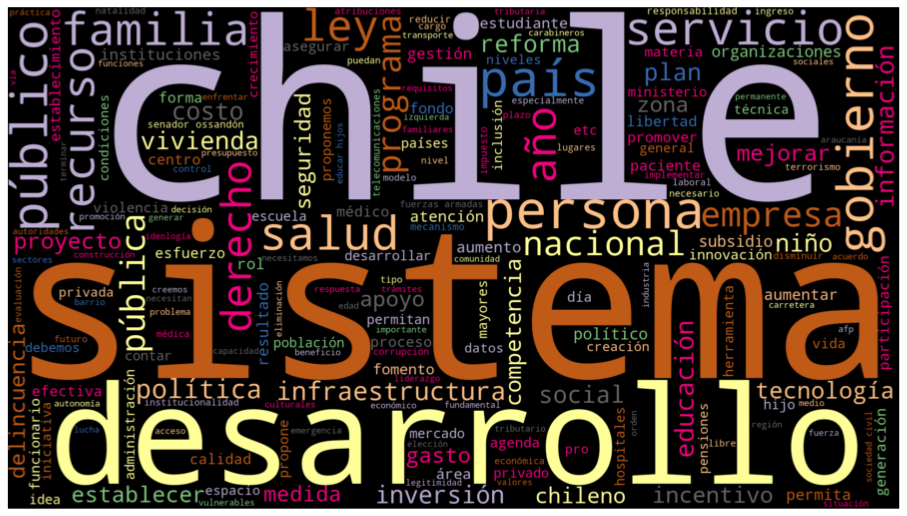

In [10]:
wordcloud(tokens['kast'],'kast')

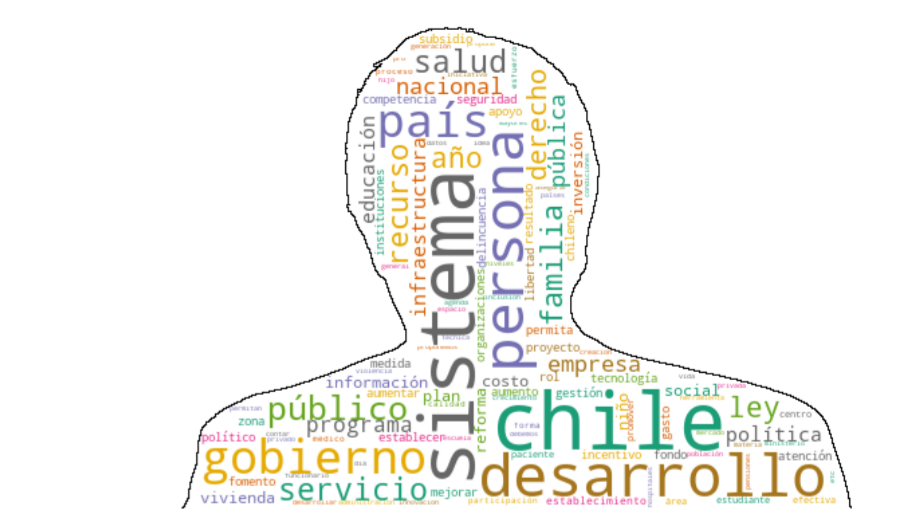

<Figure size 1440x720 with 0 Axes>

In [11]:
wordcloud(tokens['kast'],'kast', with_mask=True,mask=png_to_mask('kast.png'))

# Yasna Provoste

Programa: https://www.pdc.cl/wp-content/uploads/2021/08/Programa-Yasna-Provoste-Campillay.pdf

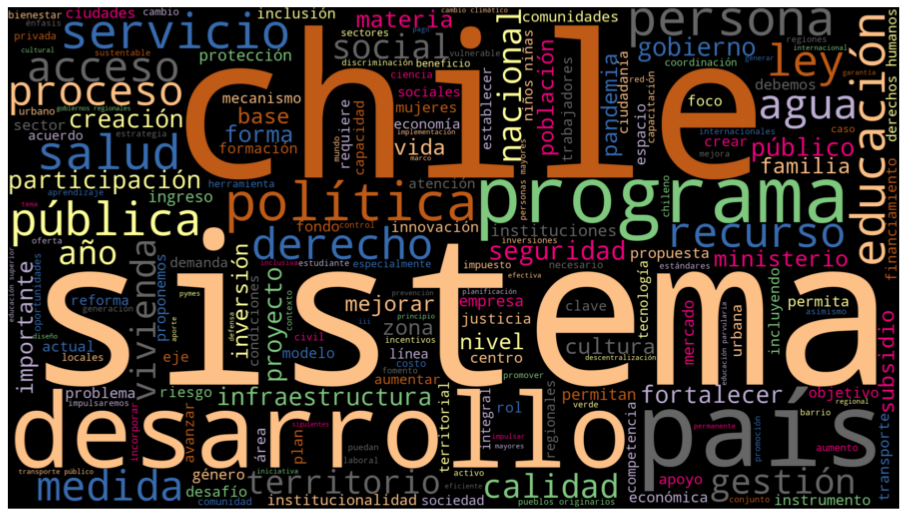

In [12]:
wordcloud(tokens['provoste'],'provoste')

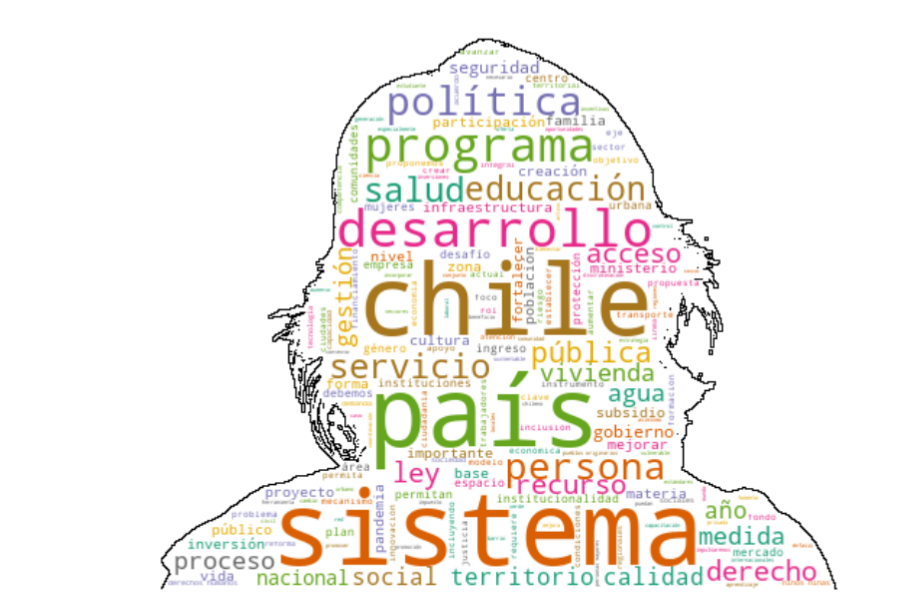

<Figure size 1440x720 with 0 Axes>

In [13]:
wordcloud(tokens['provoste'],'provoste',with_mask=True,mask=png_to_mask('provoste.png'))

# Eduardo Artés

# Marco Enriquez-Ominami

# Franco Parisi